<a href="https://colab.research.google.com/github/EngrSMU/Vessel-s-Anomaly-Behaviour-Detection/blob/master/My_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install folium

# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
#import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

from google.colab import drive
drive.mount('/content/drive')

path =  "/content/drive/MyDrive/AIS_2017_01_10.csv"

data = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
data.tail()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
6949539,431680580,2017-01-10T23:27:06,13.45870,144.65106,6.5,272.2,511.0,YUSEI MARU NO 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6949540,431680580,2017-01-10T23:38:37,13.45407,144.62945,6.9,254.5,511.0,YUSEI MARU NO 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6949541,431680580,2017-01-10T23:40:07,13.45321,144.62658,7.0,254.0,511.0,YUSEI MARU NO 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6949542,431680580,2017-01-10T23:41:36,13.45247,144.62377,6.9,261.4,511.0,YUSEI MARU NO 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6949543,431680580,2017-01-10T23:44:08,13.45239,144.61901,6.5,253.5,511.0,YUSEI MARU NO 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
data.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo'],
      dtype='object')

In [96]:
data.head(100)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,636017392,2017-01-10T00:00:00,40.93298,-73.91022,5.7,191.9,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.70,NaN,NaN,NaN
1,367452560,2017-01-10T00:00:00,32.76216,-117.23659,0.0,360.0,511.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,416000000,2017-01-10T00:00:00,32.86409,-79.96521,0.0,251.6,251.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
3,367615190,2017-01-10T00:00:02,29.97333,-93.84700,0.1,337.4,331.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
4,367462460,2017-01-10T00:00:02,29.40031,-94.75238,0.0,302.6,511.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,367596440,2017-01-10T00:00:04,28.99773,-89.39375,0.1,337.8,511.0,BATTLER,NaN,WDH2322,NaN,4.0,14.48,NaN,NaN,NaN
96,367175860,2017-01-10T00:00:02,33.76020,-118.27561,0.0,229.7,304.0,INDEPENDENCE,IMO9369239,WDD6659,1025.0,0.0,23.80,10.36,4.6,52.0
97,366953930,2017-01-10T00:00:07,40.69058,-74.12597,9.8,213.0,212.0,MATTHEW TIBBETTS,IMO8986949,WDB8156,1025.0,0.0,29.33,8.26,3.3,52.0
98,244716000,2017-01-10T00:00:07,19.10524,-64.81925,12.5,244.4,242.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.00,19.00,7.3,70.0


In [97]:
data.describe()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
count,6.949544e+06,6.949544e+06,6.949544e+06,6.949544e+06,6.949544e+06,6.949544e+06,6.479925e+06,5.880974e+06,6.230469e+06,5.201313e+06,2.173802e+06,3.048954e+06
mean,3.670684e+08,3.473093e+01,-9.477080e+01,2.191533e+00,2.011461e+02,3.732556e+02,9.684992e+02,3.821436e+00,5.229907e+01,1.241894e+01,6.286578e+00,4.680152e+01
std,5.697776e+07,8.129649e+00,2.129388e+01,5.434111e+00,1.074792e+02,1.757647e+02,2.150473e+02,5.801374e+00,6.641194e+01,9.389141e+00,4.454952e+00,2.257421e+01
min,0.000000e+00,3.680600e-01,-1.711068e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.260000e+01,0.000000e+00
25%,3.669172e+08,2.958073e+01,-9.535528e+01,0.000000e+00,1.166000e+02,2.240000e+02,1.010000e+03,0.000000e+00,1.969000e+01,7.300000e+00,3.200000e+00,3.100000e+01
50%,3.671949e+08,3.043991e+01,-9.049352e+01,0.000000e+00,2.247000e+02,5.110000e+02,1.024000e+03,0.000000e+00,2.579000e+01,9.100000e+00,4.500000e+00,5.200000e+01
75%,3.675921e+08,4.049398e+01,-8.066519e+01,2.200000e+00,2.850000e+02,5.110000e+02,1.025000e+03,5.000000e+00,4.242000e+01,1.220000e+01,9.700000e+00,6.000000e+01
max,1.000000e+09,7.450766e+01,1.479460e+02,1.023000e+02,3.600000e+02,5.110000e+02,1.025000e+03,1.500000e+01,3.668900e+02,1.000000e+02,2.500000e+01,1.970000e+02


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6949544 entries, 0 to 6949543
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   MMSI          int64  
 1   BaseDateTime  object 
 2   LAT           float64
 3   LON           float64
 4   SOG           float64
 5   COG           float64
 6   Heading       float64
 7   VesselName    object 
 8   IMO           object 
 9   CallSign      object 
 10  VesselType    float64
 11  Status        float64
 12  Length        float64
 13  Width         float64
 14  Draft         float64
 15  Cargo         float64
dtypes: float64(11), int64(1), object(4)
memory usage: 848.3+ MB


<ipython-input-99-8aec110365c6>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


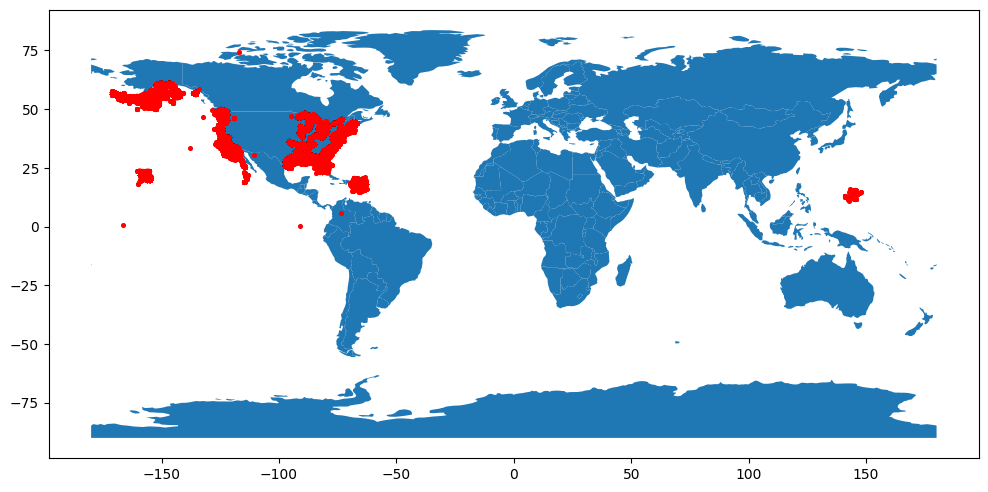

In [99]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(data['LON'], data['LAT'])]
gdf = GeoDataFrame(data, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#plt.axis([-200,-150,0,90])
gdf.plot(ax=world.plot(figsize=(12, 16)), marker='o', color='red', markersize=7);

In [100]:
# make array of tuples(tuple contain latitudes & longitudes)
lats_long = []
for i in range(len(data)):
    lats_long.append((data['LAT'][i], data['LON'][i]))

lats_long

[(40.93298, -73.91022),
 (32.76216, -117.23659),
 (32.86409, -79.96521),
 (29.97333, -93.847),
 (29.40031, -94.75238),
 (42.37977, -71.04751),
 (34.4514, -121.21065),
 (25.77844, -80.18549),
 (29.939, -90.32197),
 (34.46426, -76.4382),
 (48.15876, -122.6726),
 (29.68734, -91.17746),
 (30.01558, -93.99369),
 (28.95128, -95.33323),
 (29.73819, -95.117),
 (37.79044, -122.28811),
 (27.81074, -97.38657),
 (40.64225, -74.11952),
 (30.31147, -85.988),
 (39.98219, -80.0018),
 (40.00772, -80.74156),
 (38.40152, -82.59413),
 (32.61024, -91.14961),
 (25.80793, -80.14477),
 (29.31353, -94.77903),
 (33.11538, -117.99023),
 (60.00003, -145.66503),
 (28.98142, -95.2716),
 (30.0055, -90.79611),
 (27.87571, -97.09311),
 (26.09378, -80.17414),
 (29.76617, -95.092),
 (30.21865, -93.25707),
 (37.62507, -122.87308),
 (38.52933, -90.25883),
 (39.84987, -75.28968),
 (29.96588, -90.24831),
 (40.17548, -80.68592),
 (29.57952, -90.7155),
 (29.36185, -94.7798),
 (29.81897, -93.97862),
 (29.80415, -93.3458),
 (30

In [101]:
value_count = data['Length'].value_counts()
value_count

Length
23.77     73462
21.34     72521
22.86     65326
21.95     64553
19.81     61712
          ...  
223.30        1
126.95        1
144.52        1
34.96         1
199.00        1
Name: count, Length: 2646, dtype: int64

In [102]:
# find mode(average track length)
mode = data['Length'].mode()
mode = mode[0]
mode

23.77

In [103]:
print("The average track length is "+str(mode))

The average track length is 23.77


In [104]:
corr1 = round(data['SOG'].corr(data['VesselType']),2)
print("The correlation b/w SOG and vessel type is "+str(corr1)+" that is very small, so we can say that SOG does not vary depending upon vessel type.")

The correlation b/w SOG and vessel type is 0.02 that is very small, so we can say that SOG does not vary depending upon vessel type.


In [105]:
corr2 = round(data['COG'].corr(data['VesselType']),2)
print("The correlation b/w COG and vessel type is "+str(corr2)+" that is also very small, so we can say that COG does not vary depending upon vessel type.")

The correlation b/w COG and vessel type is 0.01 that is also very small, so we can say that COG does not vary depending upon vessel type.


In [106]:
# length with SOG
corr3 = round(data['Length'].corr(data['SOG']),2)
print("The correlation b/w Length and SOG is "+str(corr3)+" so we can say that vessel length modify SOG around 27%")

The correlation b/w Length and SOG is 0.27 so we can say that vessel length modify SOG around 27%


In [107]:
# length with COG
corr4 = round(data['Length'].corr(data['COG']),2)
print("The correlation b/w Length and COG is "+str(corr4)+" so we can say that vessel length slighly modify COG around 4%")

The correlation b/w Length and COG is -0.04 so we can say that vessel length slighly modify COG around 4%


In [108]:
# width with SOG
corr5 = round(data['Width'].corr(data['SOG']),2)
print("The correlation b/w Width and SOG is "+str(corr5)+" so we can say that vessel width modify SOG around 12%.")

The correlation b/w Width and SOG is 0.24 so we can say that vessel width modify SOG around 12%.


In [109]:
# find latitude center for all points
lat_mean = data['LAT'].mean()
lat_mean

34.73092736223272

In [110]:
# find longitude center for all points
long_mean = data['LON'].mean()
long_mean

-94.77079550575125

In [111]:
# # create folium map with markers
# import folium
# mapit = folium.Map( location=[34.73092736222088, -94.770795505752], zoom_start=6 )
# for coord in lats_long:
#     folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )


# mapit.save('map.html')

# Import the necessary library
import folium

# Define the coordinates (example data)
lats_long = [
    [34.73092736222088, -94.770795505752],
    [35.4675602, -97.5164276],
    [36.153980, -95.992775]  # Add more coordinates as needed
]

# Create a map centered at the first coordinate with a specific zoom level
mapit = folium.Map( location=[34.73092736222088, -94.770795505752], zoom_start=6)

# Loop through the coordinates and add them as markers on the map
for coord in lats_long:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )

# Display the map
mapit




In [112]:
# # find which column contain missing values
# data.isnull().any()

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/AIS_2017_01_10.csv')

# Check which columns contain missing values
missing_values = data.isnull().any()

print(missing_values)


MMSI            False
BaseDateTime    False
LAT             False
LON             False
SOG             False
COG             False
Heading         False
VesselName       True
IMO              True
CallSign         True
VesselType       True
Status           True
Length           True
Width            True
Draft            True
Cargo            True
dtype: bool


In [113]:
# put all columns in a list that contain missing values

missing_values_columns = data.columns[data.isnull().any()].tolist()
missing_values_columns

['VesselName',
 'IMO',
 'CallSign',
 'VesselType',
 'Status',
 'Length',
 'Width',
 'Draft',
 'Cargo']

In [114]:
# check how much data contain missing values by one column
data['VesselName'].isnull().sum()

282409

In [115]:
count_missing_values = []
for i in missing_values_columns:
    count = data[i].isnull().sum()
    count_missing_values.append(count)


missing_values_record = pd.DataFrame({'Column name': missing_values_columns,
                                     'Missing Value Count': count_missing_values})

missing_values_record

,Column name,Missing Value Count
0,VesselName,282409
1,IMO,4035664
2,CallSign,730452
3,VesselType,469619
4,Status,1068570
5,Length,719075
6,Width,1748231
7,Draft,4775742
8,Cargo,3900590


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Missing Value Count'].plot(kind='hist', bins=20, title='Missing Value Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Missing Value Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Missing Value Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Missing Value Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Missing Value Count'].plot(kind='line', figsize=(8, 4), title='Missing Value Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [116]:
#data = data.interpolate(method ='linear', limit_direction ='forward')
data = data.interpolate(method='linear', axis=0).ffill().bfill()

In [117]:
data.interpolate (method= 'linear', axis= 0, inplace = True)

In [118]:
data.ffill(axis = 0, inplace = True)

In [119]:
data.bfill (axis = 0, inplace= True)

In [120]:
data.head(100)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,636017392,2017-01-10T00:00:00,40.93298,-73.91022,5.7,191.9,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.000000,0.0,144.700000,7.800000,1.400000,57.000000
1,367452560,2017-01-10T00:00:00,32.76216,-117.23659,0.0,360.0,511.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1006.142857,0.0,129.232857,7.800000,1.400000,57.000000
2,416000000,2017-01-10T00:00:00,32.86409,-79.96521,0.0,251.6,251.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1008.285714,15.0,113.765714,7.800000,1.400000,57.000000
3,367615190,2017-01-10T00:00:02,29.97333,-93.84700,0.1,337.4,331.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1010.428571,15.0,98.298571,7.800000,1.400000,57.000000
4,367462460,2017-01-10T00:00:02,29.40031,-94.75238,0.0,302.6,511.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1012.571429,15.0,82.831429,7.800000,1.400000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,367596440,2017-01-10T00:00:04,28.99773,-89.39375,0.1,337.8,511.0,BATTLER,IMO8765072,WDH2322,1025.000000,4.0,14.480000,14.423333,4.533333,64.666667
96,367175860,2017-01-10T00:00:02,33.76020,-118.27561,0.0,229.7,304.0,INDEPENDENCE,IMO9369239,WDD6659,1025.000000,0.0,23.800000,10.360000,4.600000,52.000000
97,366953930,2017-01-10T00:00:07,40.69058,-74.12597,9.8,213.0,212.0,MATTHEW TIBBETTS,IMO8986949,WDB8156,1025.000000,0.0,29.330000,8.260000,3.300000,52.000000
98,244716000,2017-01-10T00:00:07,19.10524,-64.81925,12.5,244.4,242.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.000000,0.0,130.000000,19.000000,7.300000,70.000000


In [121]:
count_missing_values = []
for i in missing_values_columns:
    count = data[i].isnull().sum()
    count_missing_values.append(count)


missing_values_record = pd.DataFrame({'Column name': missing_values_columns,
                                     'Missing Value Count': count_missing_values})

missing_values_record

,Column name,Missing Value Count
0,VesselName,0
1,IMO,0
2,CallSign,0
3,VesselType,0
4,Status,0
5,Length,0
6,Width,0
7,Draft,0
8,Cargo,0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Missing Value Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Missing Value Count'}, axis=1)
              .sort_values('Missing Value Count', ascending=True))
  xs = counted['Missing Value Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = missing_values_record.sort_values('Missing Value Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Missing Value Count')
_ = plt.ylabel('count()')

In [122]:
# one MMSI represents one single vessel)
data['MMSI'].value_counts()

MMSI
316031266    1370
636013447    1364
367322740    1356
367314530    1354
367098550    1349
             ... 
538003617       1
367787096       1
367759580       1
367443450       1
367508010       1
Name: count, Length: 11176, dtype: int64

# Make dataframe of the vessel with name track1
track1 = data[data['MMSI'] == 538003617]
track1.head(100)

In [123]:
track1 = data[data['MMSI'] == 636013447]
#track1.head()

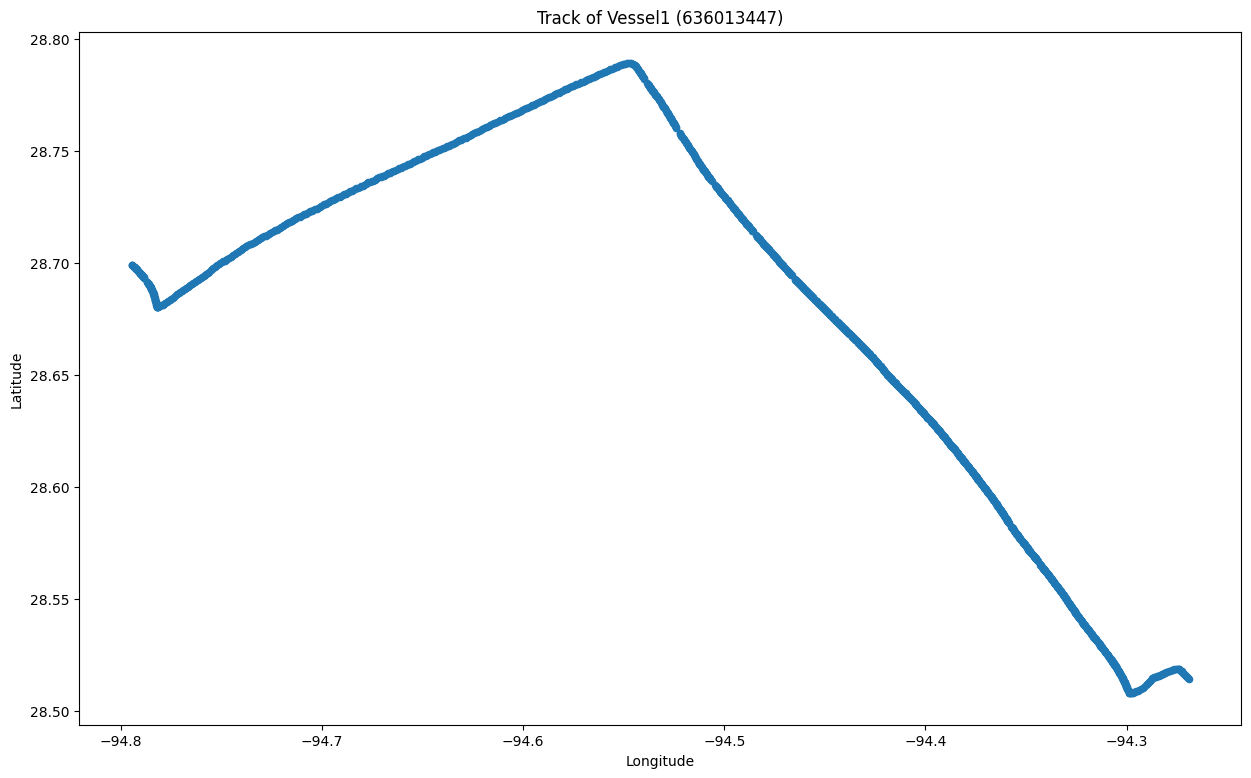

In [124]:
# Now Calculate track of the vessel1(636013447).
import matplotlib.pyplot as plt
track1.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,9))

plt.title("Track of Vessel1 (636013447)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [125]:
track2 = data[data['MMSI'] == 636017392]
track2.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,636017392,2017-01-10T00:00:00,40.93298,-73.91022,5.7,191.9,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,7.800000,1.400000,57.000000
5945,636017392,2017-01-10T00:01:10,40.93093,-73.91067,6.8,190.5,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,8.040000,1.628571,24.000000
12873,636017392,2017-01-10T00:02:19,40.92870,-73.91124,7.4,191.0,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,7.350000,3.947059,57.000000
17725,636017392,2017-01-10T00:03:20,40.92661,-73.91179,7.8,190.2,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,16.100000,6.350000,61.500000
17977,636017392,2017-01-10T00:04:29,40.92406,-73.91255,8.1,193.8,194.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,12.866667,4.114286,33.666667


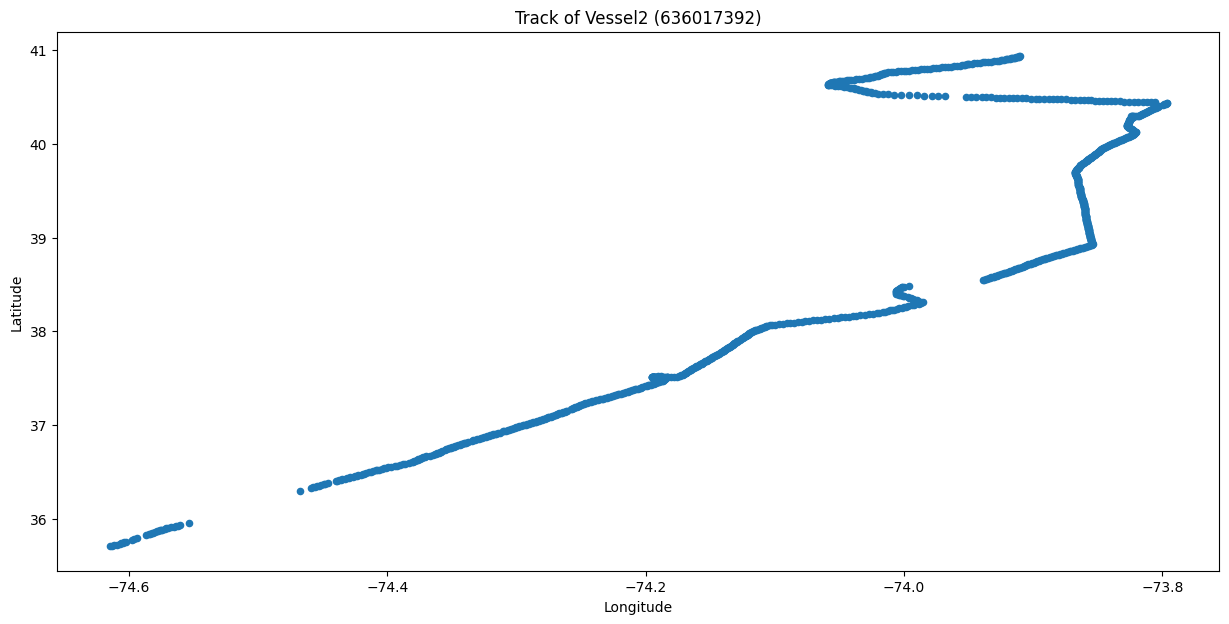

In [126]:
# Calculate track of the vessel2(636017392).
import matplotlib.pyplot as plt
track2.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,7))

plt.title("Track of Vessel2 (636017392)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [127]:
track3 = data[data['MMSI'] == 244716000]
track3.head(100)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
98,244716000,2017-01-10T00:00:07,19.10524,-64.81925,12.5,244.4,242.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
5791,244716000,2017-01-10T00:01:18,19.10334,-64.82305,12.4,242.7,244.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
14791,244716000,2017-01-10T00:02:27,19.10172,-64.82686,12.5,247.7,248.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
23684,244716000,2017-01-10T00:03:38,19.10014,-64.83086,12.3,245.4,243.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
24831,244716000,2017-01-10T00:04:47,19.09829,-64.83463,12.3,240.8,242.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524266,244716000,2017-01-10T01:57:58,18.95662,-65.16687,10.5,242.9,245.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
524273,244716000,2017-01-10T00:59:28,19.02817,-64.99548,10.9,248.5,251.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
537518,244716000,2017-01-10T02:03:38,18.94973,-65.18300,10.8,247.3,252.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0
540072,244716000,2017-01-10T02:02:29,18.95116,-65.17972,10.7,243.4,246.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0


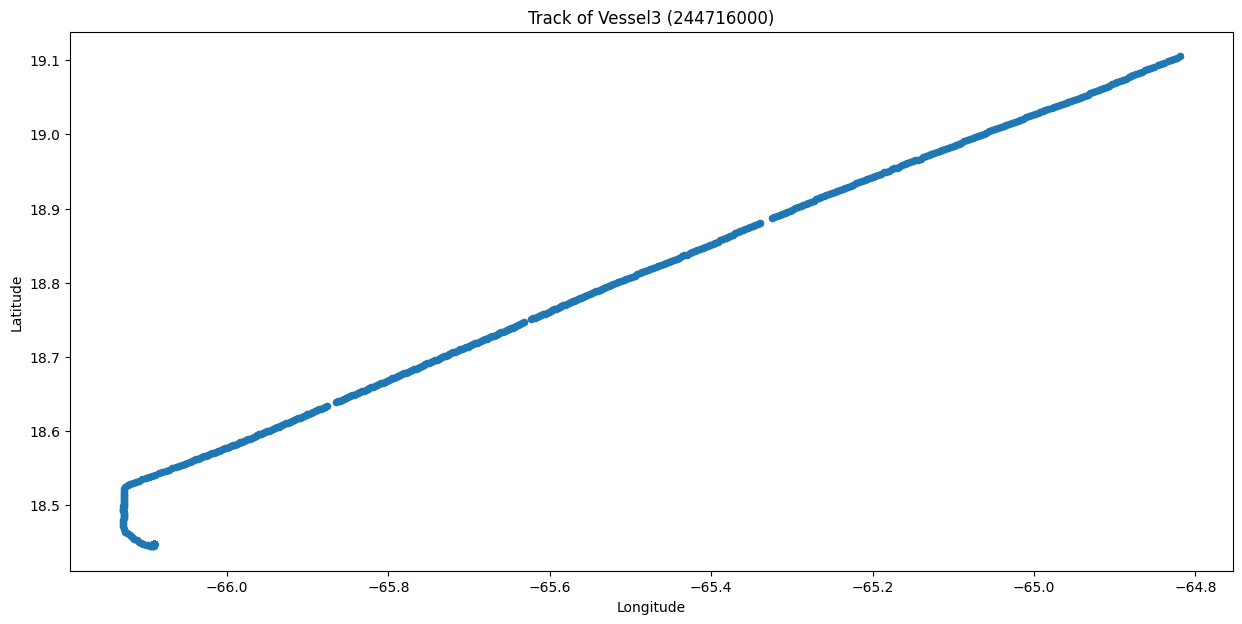

In [128]:
# Calculate track of the vessel3(244716000).
import matplotlib.pyplot as plt
track3.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,7))

plt.title("Track of Vessel3 (244716000)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [129]:
# importing all libraries
import numpy
import keras
import tensorflow
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [130]:
import numpy
numpy.random.seed(7)

In [131]:
# Seperating year, month, day, hr & minute from BaseDateTime and join them in track1(dataframe) as feature.
year = pd.DatetimeIndex(track1['BaseDateTime']).year.tolist()

month = pd.DatetimeIndex(track1['BaseDateTime']).month.tolist()

day = pd.DatetimeIndex(track1['BaseDateTime']).day.tolist()

hour = pd.DatetimeIndex(track1['BaseDateTime']).hour.tolist()

minute = pd.DatetimeIndex(track1['BaseDateTime']).minute.tolist()

track1['Year'] = year
track1['month'] = month
track1['day'] = day
track1['hour'] = hour
track1['minute'] = minute

<ipython-input-131-5ffa0bd6cc1b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1['Year'] = year
<ipython-input-131-5ffa0bd6cc1b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1['month'] = month
<ipython-input-131-5ffa0bd6cc1b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [132]:
# Track #2
# Seperating year, month, day, hr & minute from BaseDateTime and join them in track1(dataframe) as feature.
year = pd.DatetimeIndex(track2['BaseDateTime']).year.tolist()

month = pd.DatetimeIndex(track2['BaseDateTime']).month.tolist()

day = pd.DatetimeIndex(track2['BaseDateTime']).day.tolist()

hour = pd.DatetimeIndex(track2['BaseDateTime']).hour.tolist()

minute = pd.DatetimeIndex(track2['BaseDateTime']).minute.tolist()

track2['Year'] = year
track2['month'] = month
track2['day'] = day
track2['hour'] = hour
track2['minute'] = minute

<ipython-input-132-494a57197b37>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track2['Year'] = year
<ipython-input-132-494a57197b37>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track2['month'] = month
<ipython-input-132-494a57197b37>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [133]:
# Track #3
# Seperating year, month, day, hr & minute from BaseDateTime and join them in track1(dataframe) as feature.
year = pd.DatetimeIndex(track3['BaseDateTime']).year.tolist()

month = pd.DatetimeIndex(track3['BaseDateTime']).month.tolist()

day = pd.DatetimeIndex(track3['BaseDateTime']).day.tolist()

hour = pd.DatetimeIndex(track3['BaseDateTime']).hour.tolist()

minute = pd.DatetimeIndex(track3['BaseDateTime']).minute.tolist()

track3['Year'] = year
track3['month'] = month
track3['day'] = day
track3['hour'] = hour
track3['minute'] = minute

<ipython-input-133-e1bf0e0b0ca8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track3['Year'] = year
<ipython-input-133-e1bf0e0b0ca8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track3['month'] = month
<ipython-input-133-e1bf0e0b0ca8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [134]:
track1.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'Year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [135]:
track2.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'Year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [136]:
track3.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'Year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [137]:
track1.drop(['BaseDateTime'], axis = 1, inplace = True)

<ipython-input-137-78600ec7b07c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1.drop(['BaseDateTime'], axis = 1, inplace = True)


In [138]:
track2.drop(['BaseDateTime'], axis = 1, inplace = True)

<ipython-input-138-ad8b4a32c901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track2.drop(['BaseDateTime'], axis = 1, inplace = True)


In [139]:
track3.drop(['BaseDateTime'], axis = 1, inplace = True)

<ipython-input-139-66a33a5a19e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track3.drop(['BaseDateTime'], axis = 1, inplace = True)


In [140]:
track1.columns

Index(['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselName', 'IMO',
       'CallSign', 'VesselType', 'Status', 'Length', 'Width', 'Draft', 'Cargo',
       'Year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [141]:
track2.columns

Index(['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselName', 'IMO',
       'CallSign', 'VesselType', 'Status', 'Length', 'Width', 'Draft', 'Cargo',
       'Year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [142]:
track3.columns

Index(['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselName', 'IMO',
       'CallSign', 'VesselType', 'Status', 'Length', 'Width', 'Draft', 'Cargo',
       'Year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [143]:
track3.head(100)

,MMSI,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,Year,month,day,hour,minute
98,244716000,19.10524,-64.81925,12.5,244.4,242.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,0,0
5791,244716000,19.10334,-64.82305,12.4,242.7,244.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,0,1
14791,244716000,19.10172,-64.82686,12.5,247.7,248.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,0,2
23684,244716000,19.10014,-64.83086,12.3,245.4,243.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,0,3
24831,244716000,19.09829,-64.83463,12.3,240.8,242.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524266,244716000,18.95662,-65.16687,10.5,242.9,245.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,1,57
524273,244716000,19.02817,-64.99548,10.9,248.5,251.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,0,59
537518,244716000,18.94973,-65.18300,10.8,247.3,252.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,2,3
540072,244716000,18.95116,-65.17972,10.7,243.4,246.0,ANJELIERSGRACHT,IMO8821797,PCGQ,70.0,0.0,130.0,19.0,7.3,70.0,2017,1,10,2,2


In [144]:
# # finding best features to make model.
# track1.corrwith(track1.SOG).sort_values(ascending=False)

import pandas as pd

# Ensure all columns that should be numeric are converted to numeric, ignoring errors for non-numeric data
track1 = track1.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation of all numeric columns with the 'SOG' column and sort the values
correlation_with_sog = track1.corrwith(track1['SOG']).sort_values(ascending=False)

print(correlation_with_sog)

SOG           1.000000e+00
hour          6.023452e-01
LAT           5.777215e-01
minute        1.484944e-04
Draft         5.634703e-17
LON          -6.018504e-01
Heading      -6.470607e-01
COG          -8.473902e-01
MMSI                   NaN
VesselName             NaN
IMO                    NaN
CallSign               NaN
VesselType             NaN
Status                 NaN
Length                 NaN
Width                  NaN
Cargo                  NaN
Year                   NaN
month                  NaN
day                    NaN
dtype: float64


In [145]:
# # finding best features to make model.
# track2.corrwith(track2.SOG).sort_values(ascending=False)

import pandas as pd

# Ensure all columns that should be numeric are converted to numeric, forcing non-numeric data to NaN
track2 = track2.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely non-numeric (i.e., all NaN)
track2 = track2.dropna(axis=1, how='all')

# Calculate the correlation of all numeric columns with the 'SOG' column and sort the values
correlation_with_sog = track2.corrwith(track2['SOG']).sort_values(ascending=False)

print(correlation_with_sog)


SOG           1.000000e+00
hour          3.013847e-01
Heading       2.348133e-01
COG           2.224718e-01
Draft         8.065713e-02
Width         4.369190e-02
LON           1.051215e-02
Cargo         7.095534e-03
Length       -4.864802e-16
minute       -2.155286e-02
LAT          -2.833450e-01
MMSI                   NaN
VesselType             NaN
Status                 NaN
Year                   NaN
month                  NaN
day                    NaN
dtype: float64


In [146]:
# # finding best features to make model.
# track3.corrwith(track3.SOG).sort_values(ascending=False)

import pandas as pd

# Inspect data types to identify non-numeric columns
print(track3.dtypes)

# Convert all columns to numeric, forcing non-numeric data to NaN
track3_numeric = track3.apply(pd.to_numeric, errors='coerce')

# Inspect the DataFrame to see which columns have NaNs
print(track3_numeric.isnull().sum())

# Drop columns that are completely non-numeric (i.e., all NaN)
track3_numeric = track3_numeric.dropna(axis=1, how='all')

# Verify the DataFrame again to ensure all remaining columns are numeric
print(track3_numeric.dtypes)

# Calculate the correlation of all numeric columns with the 'SOG' column and sort the values
correlation_with_sog = track3_numeric.corrwith(track3_numeric['SOG']).sort_values(ascending=False)

print(correlation_with_sog)


MMSI            int64
LAT           float64
LON           float64
SOG           float64
COG           float64
Heading       float64
VesselName     object
IMO            object
CallSign       object
VesselType    float64
Status        float64
Length        float64
Width         float64
Draft         float64
Cargo         float64
Year            int64
month           int64
day             int64
hour            int64
minute          int64
dtype: object
MMSI            0
LAT             0
LON             0
SOG             0
COG             0
Heading         0
VesselName    785
IMO           785
CallSign      785
VesselType      0
Status          0
Length          0
Width           0
Draft           0
Cargo           0
Year            0
month           0
day             0
hour            0
minute          0
dtype: int64
MMSI            int64
LAT           float64
LON           float64
SOG           float64
COG           float64
Heading       float64
VesselType    float64
Status        float

In [147]:
#track1.corrwith(track1.SOG).sort_values(ascending=False).plot.bar(
#        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
#        rot = 45, grid = True)
track1.corrwith(track1.SOG).sort_values(ascending=False)

SOG           1.000000e+00
hour          6.023452e-01
LAT           5.777215e-01
minute        1.484944e-04
Draft         5.634703e-17
LON          -6.018504e-01
Heading      -6.470607e-01
COG          -8.473902e-01
MMSI                   NaN
VesselName             NaN
IMO                    NaN
CallSign               NaN
VesselType             NaN
Status                 NaN
Length                 NaN
Width                  NaN
Cargo                  NaN
Year                   NaN
month                  NaN
day                    NaN
dtype: float64

<Axes: title={'center': 'Correlation with class'}>

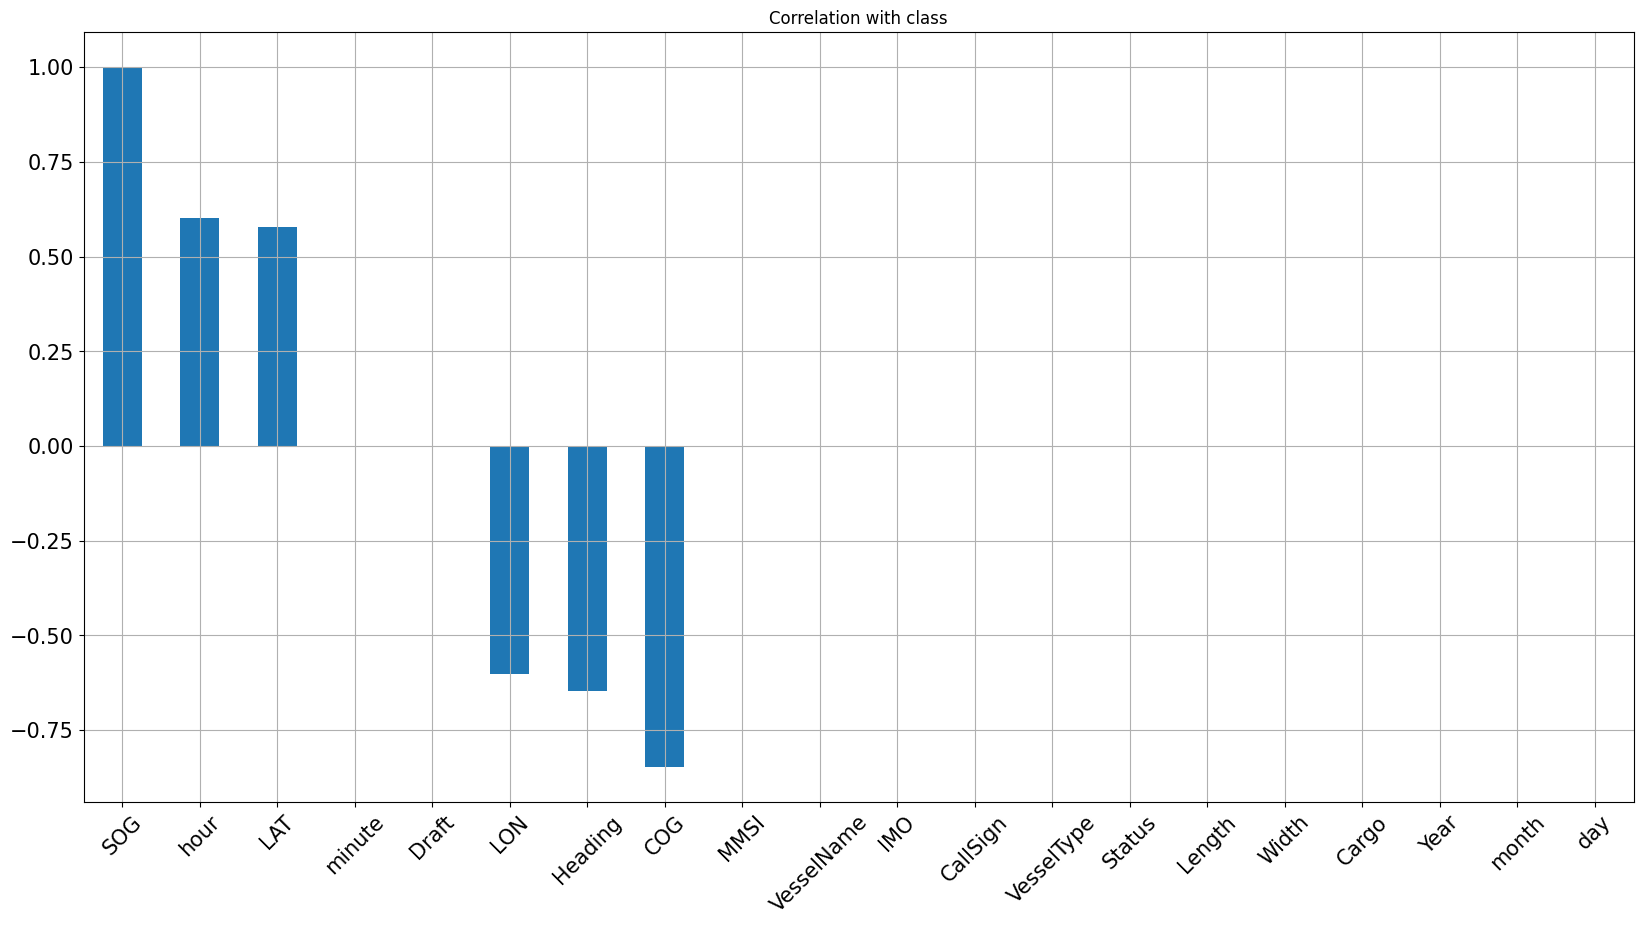

In [148]:
track1.corrwith(track1.SOG).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

<Axes: title={'center': 'Correlation with class'}>

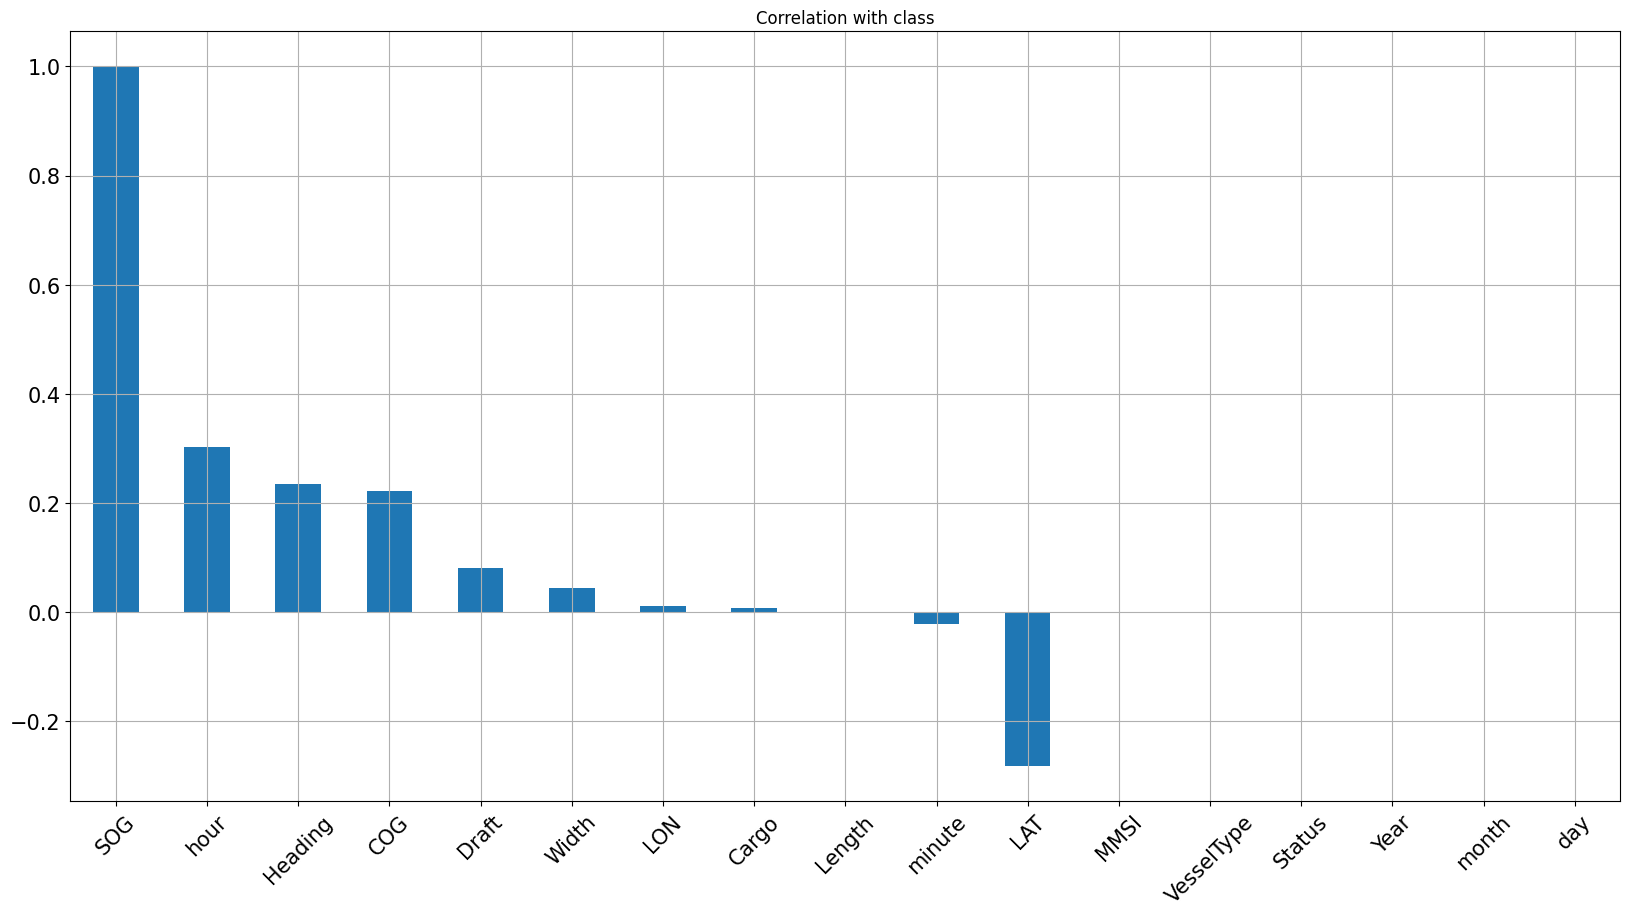

In [149]:
track2.corrwith(track2.SOG).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

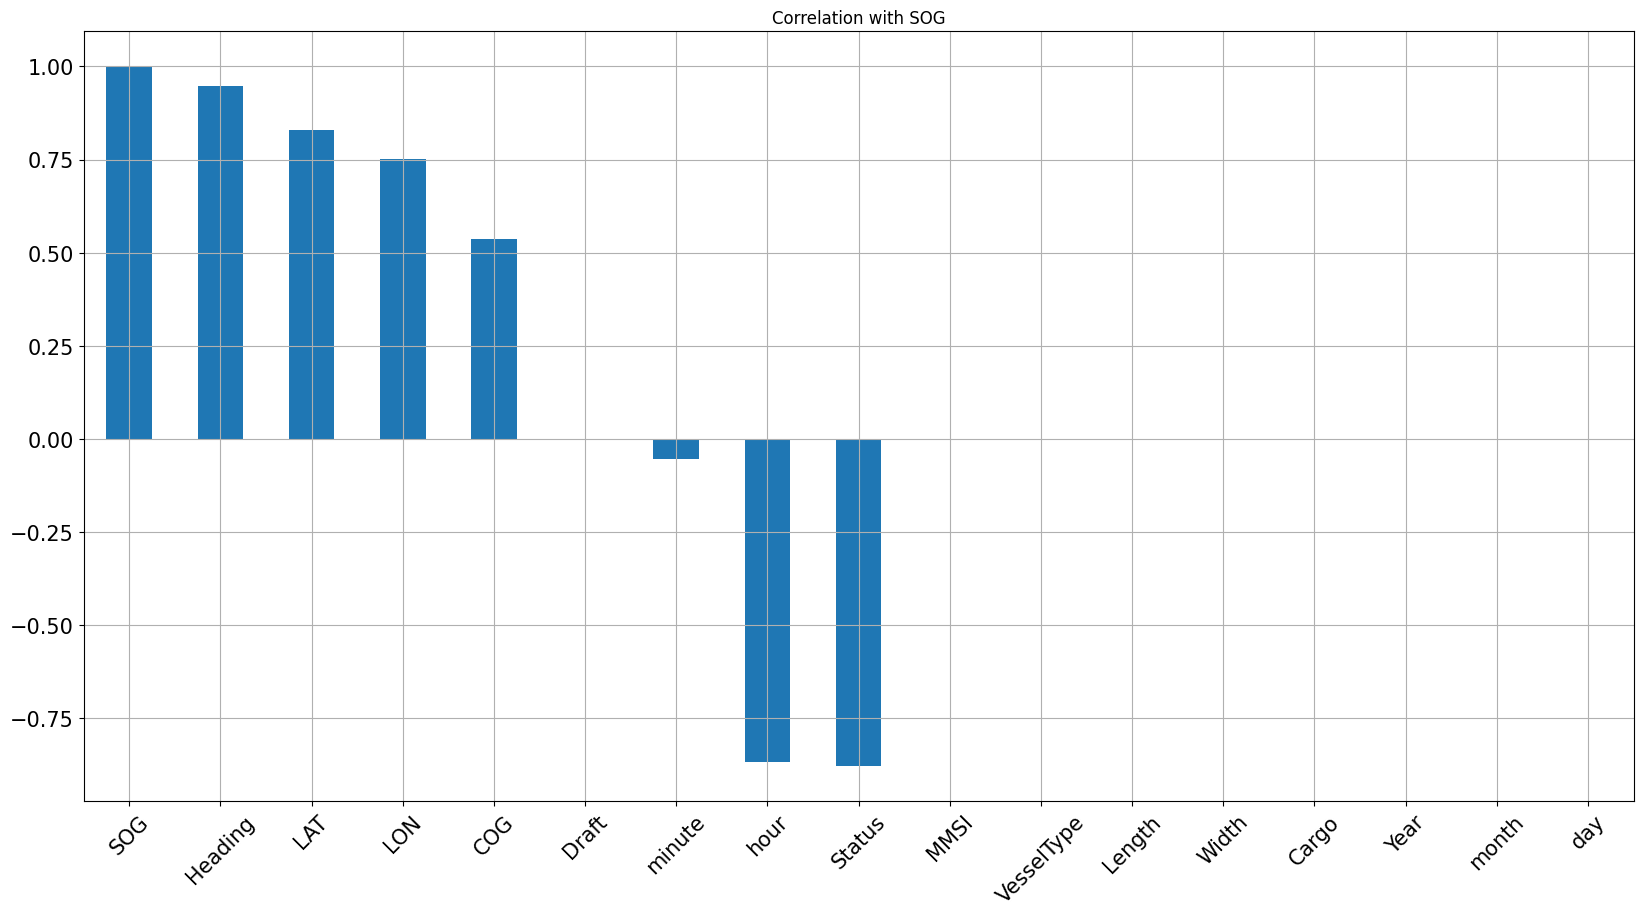

In [150]:
# track3.corrwith(track3.SOG).sort_values(ascending=False).plot.bar(
#         figsize = (20, 10), title = "Correlation with class", fontsize = 15,
#         rot = 45, grid = True)

import pandas as pd
import matplotlib.pyplot as plt

# Ensure all columns that should be numeric are converted to numeric, forcing non-numeric data to NaN
track3 = track3.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely non-numeric (i.e., all NaN)
track3 = track3.dropna(axis=1, how='all')

# Ensure the 'SOG' column is also numeric and not completely NaN
if 'SOG' in track3.columns:
    if track3['SOG'].isnull().all():
        raise ValueError("The 'SOG' column contains only non-numeric data or is completely NaN.")
else:
    raise KeyError("The 'SOG' column does not exist in the DataFrame.")

# Calculate the correlation of all numeric columns with the 'SOG' column and sort the values
correlation_with_sog = track3.corrwith(track3['SOG']).sort_values(ascending=False)

# Plot the correlations
correlation_with_sog.plot.bar(figsize=(20, 10), title="Correlation with SOG", fontsize=15, rot=45, grid=True)
plt.show()

In [151]:
y = track1['SOG'].ravel()
y

array([0.8, 0.8, 0.8, ..., 0.8, 0.9, 0.7])

In [152]:
y = track2['SOG'].ravel()
y

array([ 5.7,  6.8,  7.4, ..., 12.3, 12.3, 12.3])

In [153]:
#Track 3
y = track3['SOG'].ravel()
y

array([12.5, 12.4, 12.5, 12.3, 12.3, 12.4, 12.3, 12.4, 12.3, 12.4, 12.3,
       12.4, 11.1, 11.8, 10.8, 10.6, 10.7, 10.7, 10.6, 10.6, 10.7, 10.6,
       10.6, 10.6, 11.5, 10.6, 10.6, 10.6, 10.6, 10.9, 10.7, 10.7, 10.7,
       10.7, 10.6, 10.7, 10.7, 10.8, 10.7, 10.7, 10.8, 10.8, 10.7, 10.8,
       10.8, 10.9, 10.8, 10.9, 10.8, 10.9, 11. , 11.1, 11. , 11.1, 10.6,
       11. , 11. , 11.1, 11.1, 11. , 11.1, 11.1, 11. , 11.1, 11.1, 11.1,
       11.1, 11.1, 11.1, 11.1, 11.1, 11. , 11.1, 11.1, 10.9, 11.1, 10.9,
       10.8, 10.8, 10.8, 10.9, 10.8, 10.9, 10.7, 10.8, 10.8, 10.8, 10.7,
       10.7, 10.6, 10.6, 10.6, 10.6, 10.7, 10.7, 10.5, 10.9, 10.8, 10.7,
       10.6, 10.8, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.8, 10.7,
       10.7, 10.6, 10.4, 10.4, 10.5, 10.4, 10.3, 10.5, 10.4, 10.3, 10.3,
       10.3, 10.3, 10.3, 11.1, 10.3, 11.1, 10.3, 10.3, 10.4, 10.3, 10.3,
       10.4, 10.3, 10.3, 10.2, 11. , 10.2, 10.3, 10.3, 10.2, 10.4, 10.2,
       10.2, 10.2, 10.3, 10.2, 10.2, 10.1, 10.3, 10

In [154]:
X = track1[['LAT', 'hour','Heading', 'COG']]
X

,LAT,hour,Heading,COG
16340,28.51465,0,238.0,316.0
16950,28.51483,0,238.0,316.0
20155,28.51502,0,238.0,316.0
22274,28.51521,0,238.0,316.0
27923,28.51559,0,239.0,315.0
...,...,...,...,...
6920839,28.69337,23,234.0,322.0
6924804,28.69401,23,232.0,319.0
6924853,28.69463,23,230.0,321.0
6931432,28.69652,23,231.0,316.0


In [155]:
#Track 2
X = track2[['LAT', 'hour','Heading', 'COG']]
X

,LAT,hour,Heading,COG
0,40.93298,0,192.0,191.9
5945,40.93093,0,192.0,190.5
12873,40.92870,0,192.0,191.0
17725,40.92661,0,192.0,190.2
17977,40.92406,0,194.0,193.8
...,...,...,...,...
6912587,35.89476,22,190.0,190.5
6915434,35.87035,23,190.0,189.4
6921077,35.84880,23,189.0,190.7
6939164,35.72608,23,192.0,195.0


In [156]:
#Track 2
X = track3[['LAT', 'hour','Heading', 'LON']]
X

,LAT,hour,Heading,LON
98,19.10524,0,242.0,-64.81925
5791,19.10334,0,244.0,-64.82305
14791,19.10172,0,248.0,-64.82686
23684,19.10014,0,243.0,-64.83086
24831,19.09829,0,242.0,-64.83463
...,...,...,...,...
6811474,18.44776,20,31.0,-66.09034
6827071,18.44774,20,31.0,-66.09034
6882798,18.44779,22,31.0,-66.09037
6930170,18.44773,23,31.0,-66.09039


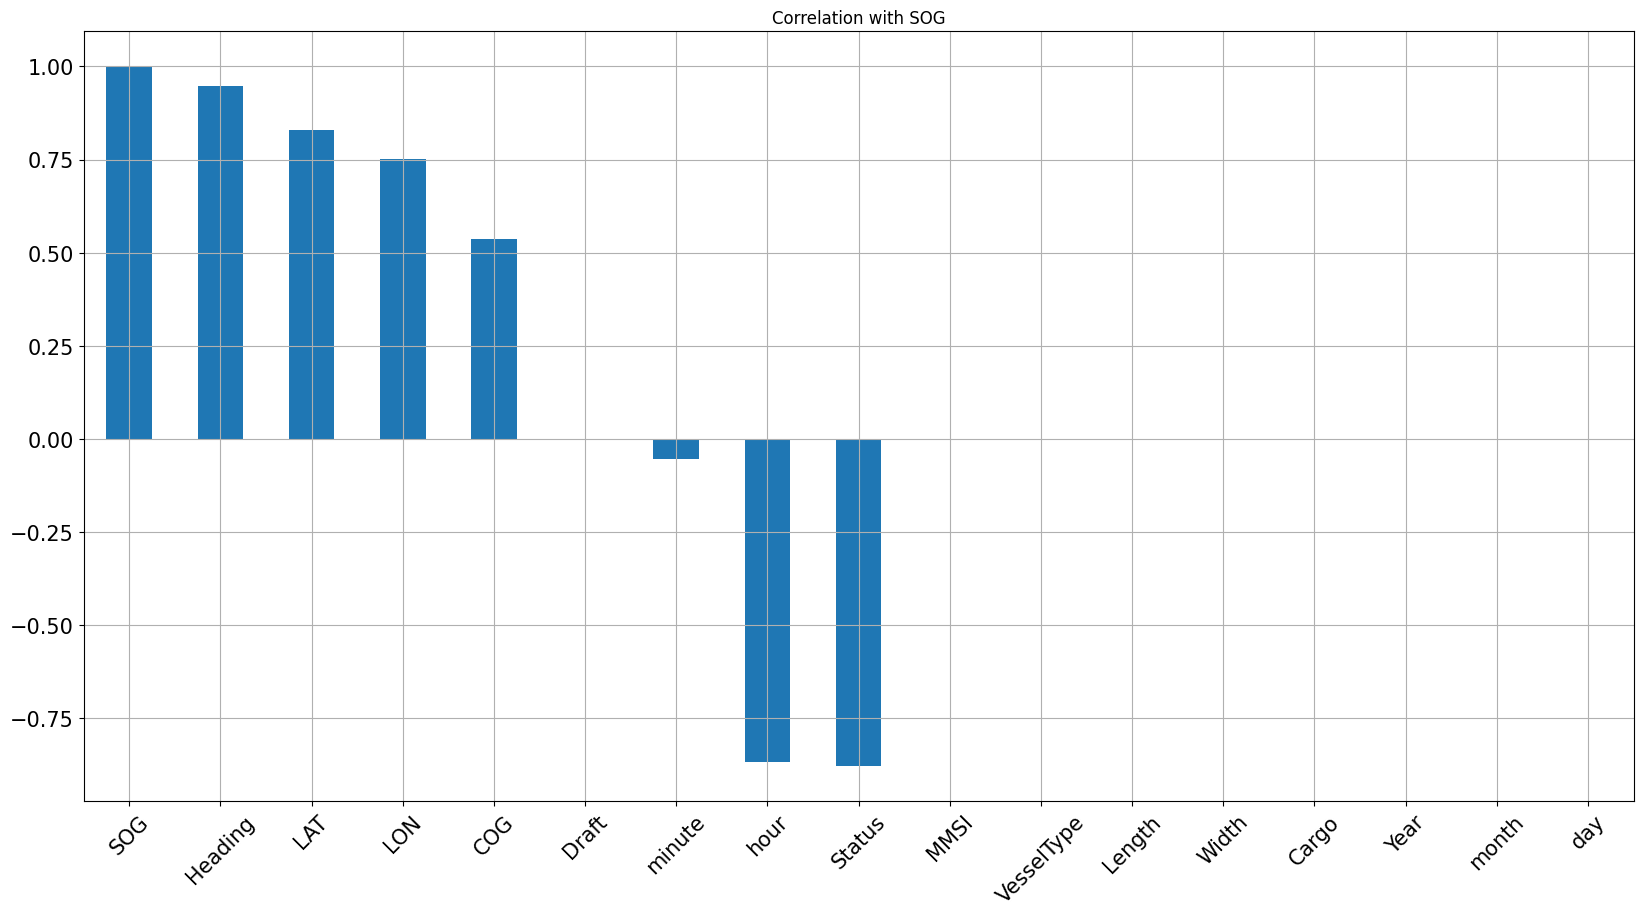

In [157]:
# from sklearn.preprocessing import StandardScaler
# X['normalizedLAT'] = StandardScaler().fit_transform(X['LAT'].values.reshape(-1,1))
# X['normalizedhour'] = StandardScaler().fit_transform(X['hour'].values.reshape(-1,1))
# #X['normalizedLon'] = StandardScaler().fit_transform(X['LON'].values.reshape(-1,1))
# X['normalizedHeading'] = StandardScaler().fit_transform(X['Heading'].values.reshape(-1,1))
# X['normalizedCOG'] = StandardScaler().fit_transform(X['COG'].values.reshape(-1,1))


# #track1 = credit_card_data_sample.drop(['Amount'],axis=1)
# X.drop(['LAT', 'hour', 'Heading', 'COG'], axis = 1, inplace = True)

import pandas as pd
import matplotlib.pyplot as plt

# Ensure all columns that should be numeric are converted to numeric, forcing non-numeric data to NaN
track3 = track3.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely non-numeric (i.e., all NaN)
track3 = track3.dropna(axis=1, how='all')

# Check if the 'SOG' column exists and is not completely NaN
if 'SOG' not in track3.columns:
    raise KeyError("The 'SOG' column does not exist in the DataFrame.")

if track3['SOG'].isnull().all():
    raise ValueError("The 'SOG' column contains only non-numeric data or is completely NaN.")

# Calculate the correlation of all numeric columns with the 'SOG' column
correlation_with_sog = track3.corrwith(track3['SOG']).sort_values(ascending=False)

# Plot the correlations
correlation_with_sog.plot.bar(
    figsize=(20, 10), title="Correlation with SOG", fontsize=15, rot=45, grid=True
)
plt.show()


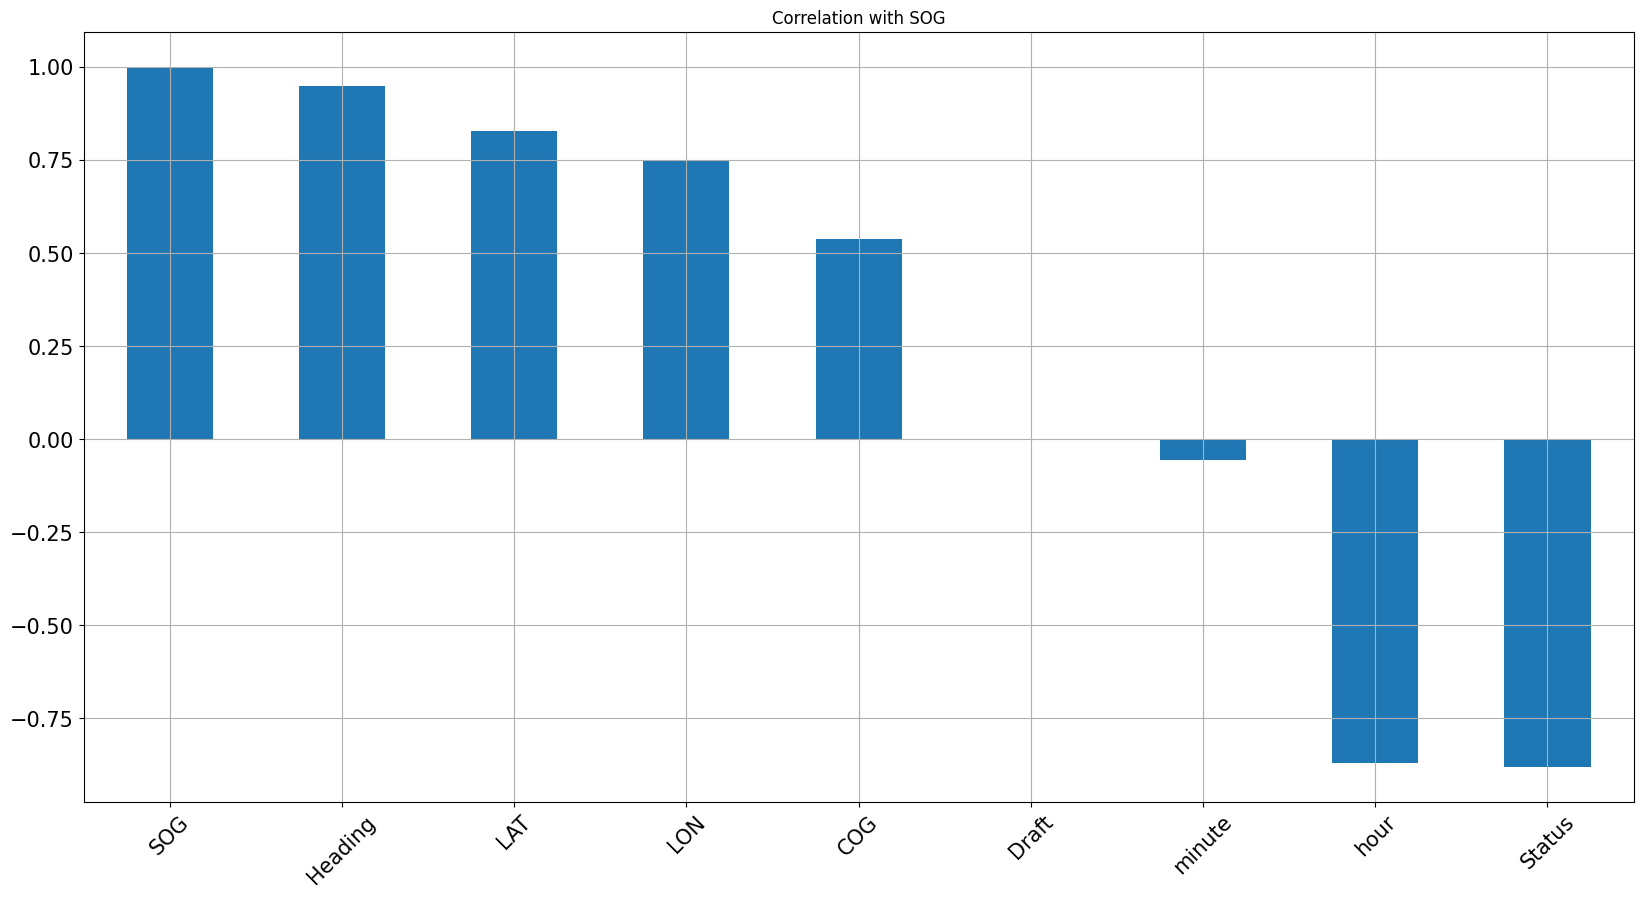

In [158]:
# from sklearn.preprocessing import StandardScaler
# X['normalizedLAT'] = StandardScaler().fit_transform(X['LAT'].values.reshape(-1,1))
# X['normalizedhour'] = StandardScaler().fit_transform(X['hour'].values.reshape(-1,1))
# #X['normalizedLon'] = StandardScaler().fit_transform(X['LON'].values.reshape(-1,1))
# X['normalizedHeading'] = StandardScaler().fit_transform(X['Heading'].values.reshape(-1,1))
# X['normalizedCOG'] = StandardScaler().fit_transform(X['COG'].values.reshape(-1,1))


# #track1 = credit_card_data_sample.drop(['Amount'],axis=1)
# X.drop(['LAT', 'hour', 'Heading', 'COG'], axis = 1, inplace = True)

import pandas as pd
import matplotlib.pyplot as plt

# Ensure all columns that should be numeric are converted to numeric, forcing non-numeric data to NaN
track3 = track3.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely non-numeric (i.e., all NaN)
track3 = track3.dropna(axis=1, how='all')

# Check if the 'SOG' column exists and is not completely NaN
if 'SOG' not in track3.columns:
    raise KeyError("The 'SOG' column does not exist in the DataFrame.")

if track3['SOG'].isnull().all():
    raise ValueError("The 'SOG' column contains only non-numeric data or is completely NaN.")

# Calculate the correlation of all numeric columns with the 'SOG' column and sort the values
correlation_with_sog = track3.corrwith(track3['SOG']).dropna().sort_values(ascending=False)

# Plot the correlations
correlation_with_sog.plot.bar(
    figsize=(20, 10), title="Correlation with SOG", fontsize=15, rot=45, grid=True
)
plt.show()

Columns in track3 after conversion and dropping non-numeric columns:
Index(['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'Year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')
Correlation with SOG:
SOG        1.000000e+00
Heading    9.487126e-01
LAT        8.288655e-01
LON        7.503657e-01
COG        5.367535e-01
Draft     -3.706303e-16
minute    -5.524657e-02
hour      -8.691950e-01
Status    -8.798145e-01
dtype: float64


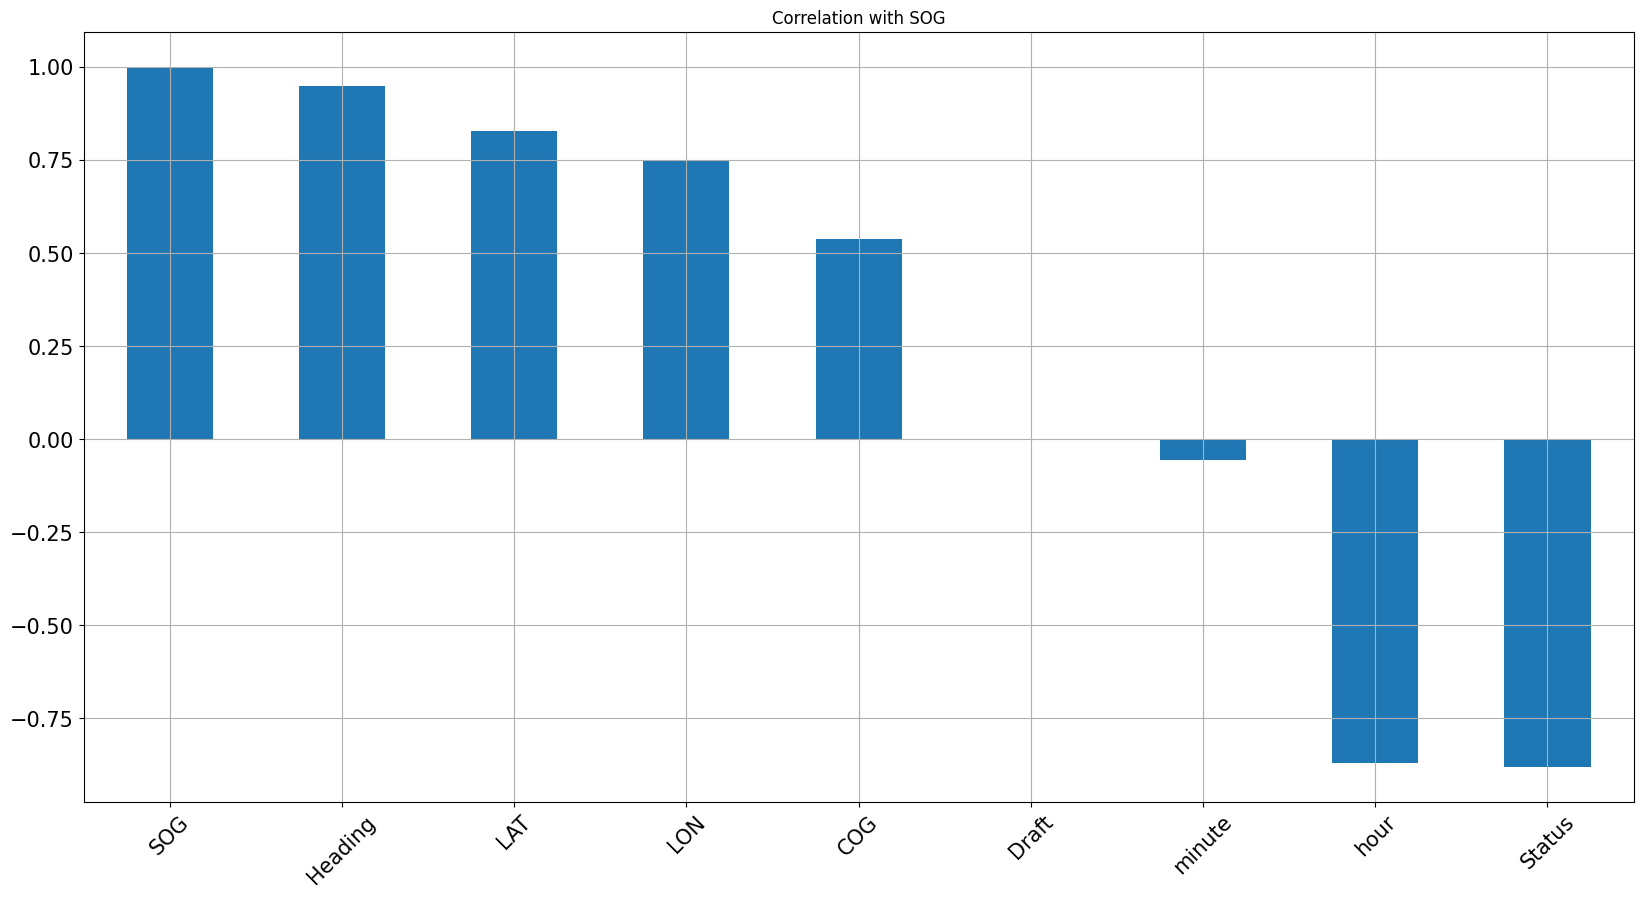

In [159]:
# #Track 3
# from sklearn.preprocessing import StandardScaler
# X['normalizedLAT'] = StandardScaler().fit_transform(X['LAT'].values.reshape(-1,1))
# #X['normalizedhour'] = StandardScaler().fit_transform(X['hour'].values.reshape(-1,1))
# X['normalizedLon'] = StandardScaler().fit_transform(X['LON'].values.reshape(-1,1))
# X['normalizedHeading'] = StandardScaler().fit_transform(X['Heading'].values.reshape(-1,1))
# X['normalizedCOG'] = StandardScaler().fit_transform(X['COG'].values.reshape(-1,1))


# #track1 = credit_card_data_sample.drop(['Amount'],axis=1)
# X.drop(['LAT', 'LON', 'Heading', 'COG'], axis = 1, inplace = True)

import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame for illustration (replace with actual DataFrame loading code)
# track3 = pd.read_csv('your_data_file.csv')

# Ensure all columns that should be numeric are converted to numeric, forcing non-numeric data to NaN
track3 = track3.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely non-numeric (i.e., all NaN)
track3 = track3.dropna(axis=1, how='all')

# Print the columns to debug and see what we have after conversion and dropping
print("Columns in track3 after conversion and dropping non-numeric columns:")
print(track3.columns)

# Check if the 'SOG' column exists and is not completely NaN
if 'SOG' not in track3.columns:
    raise KeyError("The 'SOG' column does not exist in the DataFrame.")

if track3['SOG'].isnull().all():
    raise ValueError("The 'SOG' column contains only non-numeric data or is completely NaN.")

# Calculate the correlation of all numeric columns with the 'SOG' column and sort the values
correlation_with_sog = track3.corrwith(track3['SOG']).dropna().sort_values(ascending=False)

# Print the correlation results to debug
print("Correlation with SOG:")
print(correlation_with_sog)

# Plot the correlations
correlation_with_sog.plot.bar(
    figsize=(20, 10), title="Correlation with SOG", fontsize=15, rot=45, grid=True
)
plt.show()

In [160]:
X.head()

,LAT,hour,Heading,LON
98,19.10524,0,242.0,-64.81925
5791,19.10334,0,244.0,-64.82305
14791,19.10172,0,248.0,-64.82686
23684,19.10014,0,243.0,-64.83086
24831,19.09829,0,242.0,-64.83463


In [161]:
y[:5]

array([12.5, 12.4, 12.5, 12.3, 12.3])

In [162]:
 # train & test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (628, 4) (628,)
Test set: (157, 4) (157,)


In [163]:
# import SVR from SVM
from sklearn.svm import SVR

In [164]:
# building model
regressor = SVR(gamma='scale', C = 100000, epsilon=0.45)

In [165]:
# fitting model
regressor.fit(x_train, y_train)

SVR(C=100000, epsilon=0.45)

In [166]:
yhat = regressor.predict(x_test)
yhat [0:5]


array([ 0.44224831, 11.24933274,  8.7696036 ,  8.96585955,  8.62774919])

In [167]:
# find accuracy(R2 Score)
from sklearn.metrics import r2_score
print(round(r2_score(y_test, yhat),2))

0.94


In [168]:
# calculate MAE
error = mean_squared_error(yhat, y_test)

In [169]:
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 1.3392410153855099


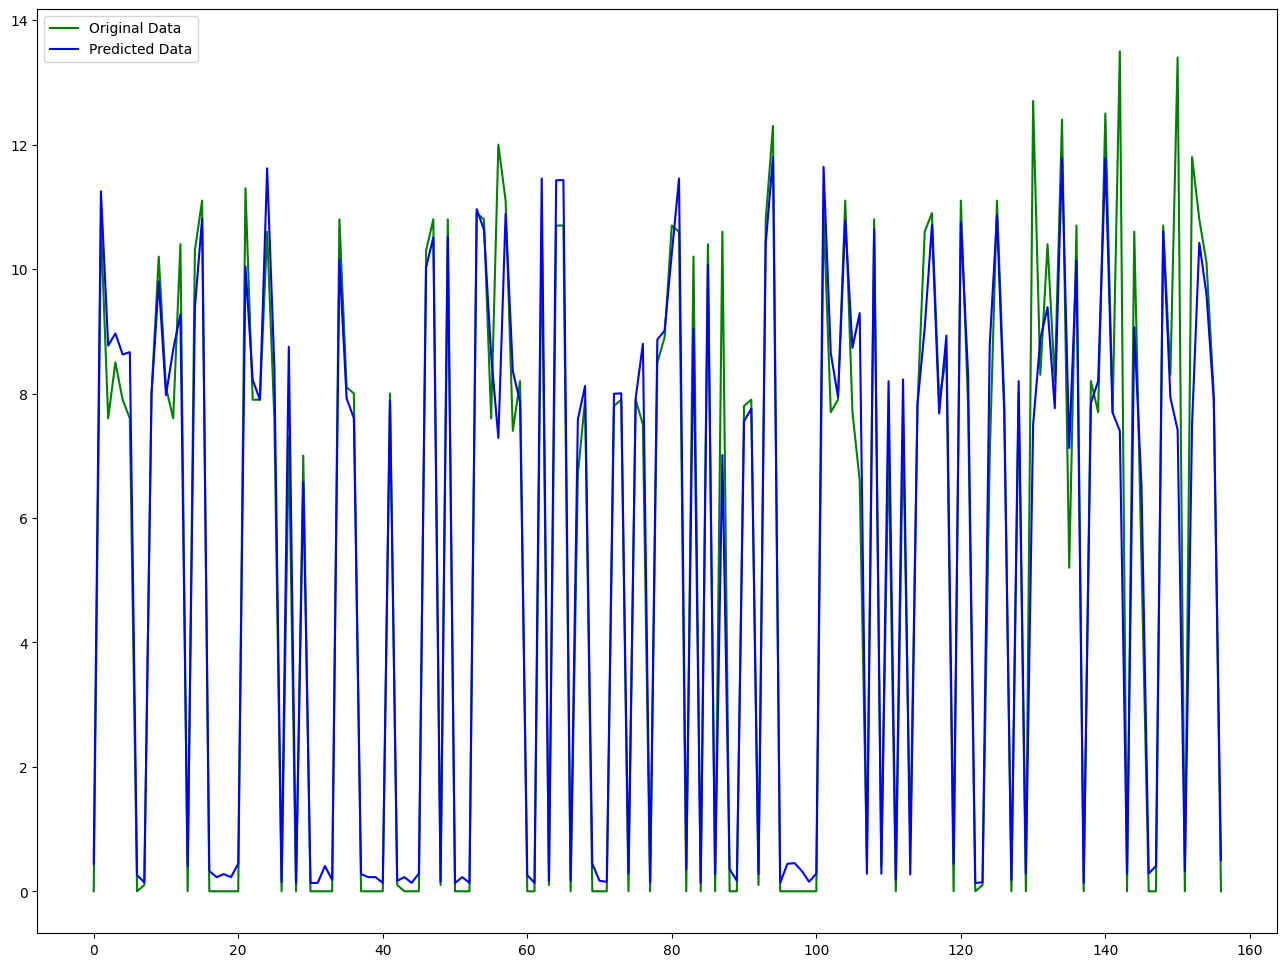

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
labels = ['Original Data', 'Predicted Data']
plt.plot(y_test, color = 'green', label = 'Original Data')
plt.plot(yhat, color = 'blue', label = 'Predicted Data')
plt.legend(labels)
plt.show()

In [171]:
# round off predicted values
import numpy as np
yhat = np.round(yhat,1)
yhat[:5]

array([ 0.4, 11.2,  8.8,  9. ,  8.6])

In [172]:
# make df of predicted & real values
predicted_vs_real = pd.DataFrame({'Actual': y_test,
                                 'Predicted': yhat})

predicted_vs_real

,Actual,Predicted
0,0.0,0.4
1,10.7,11.2
2,7.6,8.8
3,8.5,9.0
4,7.9,8.6
...,...,...
152,11.8,7.5
153,10.8,10.4
154,10.1,9.6
155,8.0,7.9


In [173]:
predicted_vs_real['difference'] = predicted_vs_real['Actual'] - predicted_vs_real['Predicted']
predicted_vs_real

,Actual,Predicted,difference
0,0.0,0.4,-0.4
1,10.7,11.2,-0.5
2,7.6,8.8,-1.2
3,8.5,9.0,-0.5
4,7.9,8.6,-0.7
...,...,...,...
152,11.8,7.5,4.3
153,10.8,10.4,0.4
154,10.1,9.6,0.5
155,8.0,7.9,0.1


In [174]:
predicted_vs_real['difference'].value_counts()

difference
-0.1    17
-0.2    14
-0.3    14
-0.4    10
 0.0     8
 0.4     5
-0.5     4
 0.3     4
 0.3     4
 0.1     4
 0.5     4
 0.2     3
 0.2     3
-1.0     3
 0.2     3
-0.1     3
-0.9     2
-0.7     2
 1.5     2
-1.0     2
-0.2     2
 0.4     2
-0.8     2
-0.7     2
-1.1     2
 0.6     2
 0.2     1
-1.8     1
 6.0     1
-0.8     1
-0.3     1
-0.5     1
 5.2     1
-1.2     1
 6.1     1
-0.6     1
 0.7     1
-0.5     1
-1.9     1
 1.0     1
 0.1     1
-1.3     1
-2.7     1
-0.2     1
-1.2     1
 0.4     1
 1.1     1
 0.9     1
 1.3     1
-0.3     1
-1.5     1
 0.7     1
 4.7     1
-0.2     1
-0.4     1
-0.9     1
 1.2     1
 3.6     1
 0.1     1
 4.3     1
Name: count, dtype: int64

In [175]:
rounded_difference = predicted_vs_real['difference'].tolist()
rounded_difference = np.round(rounded_difference,0)

In [176]:
predicted_vs_real['Rounded Difference'] = rounded_difference
predicted_vs_real

,Actual,Predicted,difference,Rounded Difference
0,0.0,0.4,-0.4,-0.0
1,10.7,11.2,-0.5,-0.0
2,7.6,8.8,-1.2,-1.0
3,8.5,9.0,-0.5,-0.0
4,7.9,8.6,-0.7,-1.0
...,...,...,...,...
152,11.8,7.5,4.3,4.0
153,10.8,10.4,0.4,0.0
154,10.1,9.6,0.5,0.0
155,8.0,7.9,0.1,0.0


In [177]:
predicted_vs_real['Rounded Difference'].value_counts()

Rounded Difference
-0.0    114
-1.0     22
 1.0      9
-2.0      3
 5.0      2
 4.0      2
 2.0      2
 6.0      2
-3.0      1
Name: count, dtype: int64

In [178]:
# The rows giving larger difference are anamolous by setting threshold of 0.5
anamolies = predicted_vs_real[(predicted_vs_real['difference']>= 0.5) |(predicted_vs_real['difference']<= -0.5)]
anamolies

,Actual,Predicted,difference,Rounded Difference
1,10.7,11.2,-0.5,-0.0
2,7.6,8.8,-1.2,-1.0
3,8.5,9.0,-0.5,-0.0
4,7.9,8.6,-0.7,-1.0
5,7.6,8.7,-1.1,-1.0
11,7.6,8.7,-1.1,-1.0
12,10.4,9.3,1.1,1.0
14,10.3,9.4,0.9,1.0
21,11.3,10.0,1.3,1.0
24,10.6,11.6,-1.0,-1.0


In [179]:
len(x_test)

157

In [180]:
x_test.reset_index(inplace = True)

In [181]:
x_test.drop('index', axis = 1, inplace = True)

In [182]:
x_test

,LAT,hour,Heading,LON
0,18.44774,23,31.0,-66.09038
1,19.04455,0,248.0,-64.95407
2,18.76952,4,243.0,-65.58321
3,18.79160,4,247.0,-65.53493
4,18.74195,5,244.0,-65.64155
...,...,...,...,...
152,18.55451,8,247.0,-66.05568
153,18.97593,1,251.0,-65.12036
154,18.86652,3,239.0,-65.37006
155,18.64822,6,243.0,-65.84464


In [183]:
anamolies_indices = anamolies.index.tolist()
anamolies_indices

[1,
 2,
 3,
 4,
 5,
 11,
 12,
 14,
 21,
 24,
 25,
 27,
 34,
 55,
 56,
 58,
 62,
 64,
 65,
 67,
 76,
 80,
 81,
 83,
 87,
 94,
 97,
 101,
 102,
 105,
 106,
 110,
 112,
 113,
 115,
 121,
 124,
 130,
 131,
 132,
 134,
 135,
 136,
 140,
 142,
 144,
 145,
 150,
 152,
 154,
 156]

In [184]:
# So now the anomalies are:
x_test.iloc[anamolies_indices]

,LAT,hour,Heading,LON
1,19.04455,0,248.0,-64.95407
2,18.76952,4,243.0,-65.58321
3,18.79160,4,247.0,-65.53493
4,18.74195,5,244.0,-65.64155
5,18.76402,4,238.0,-65.59484
11,18.76287,4,242.0,-65.59675
12,18.82988,3,242.0,-65.44946
14,18.84109,3,242.0,-65.42362
21,18.45973,9,129.0,-66.12034
24,19.06574,0,241.0,-64.90682


In [185]:
# Make dataframe of the vessel with name track1
track1 = data[data['MMSI'] == 	636017392]
track1.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,636017392,2017-01-10T00:00:00,40.93298,-73.91022,5.7,191.9,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,7.800000,1.400000,57.000000
5945,636017392,2017-01-10T00:01:10,40.93093,-73.91067,6.8,190.5,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,8.040000,1.628571,24.000000
12873,636017392,2017-01-10T00:02:19,40.92870,-73.91124,7.4,191.0,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,7.350000,3.947059,57.000000
17725,636017392,2017-01-10T00:03:20,40.92661,-73.91179,7.8,190.2,192.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,16.100000,6.350000,61.500000
17977,636017392,2017-01-10T00:04:29,40.92406,-73.91255,8.1,193.8,194.0,INDUSTRIAL SKIPPER,IMO9741138,D5KR6,1004.0,0.0,144.7,12.866667,4.114286,33.666667


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


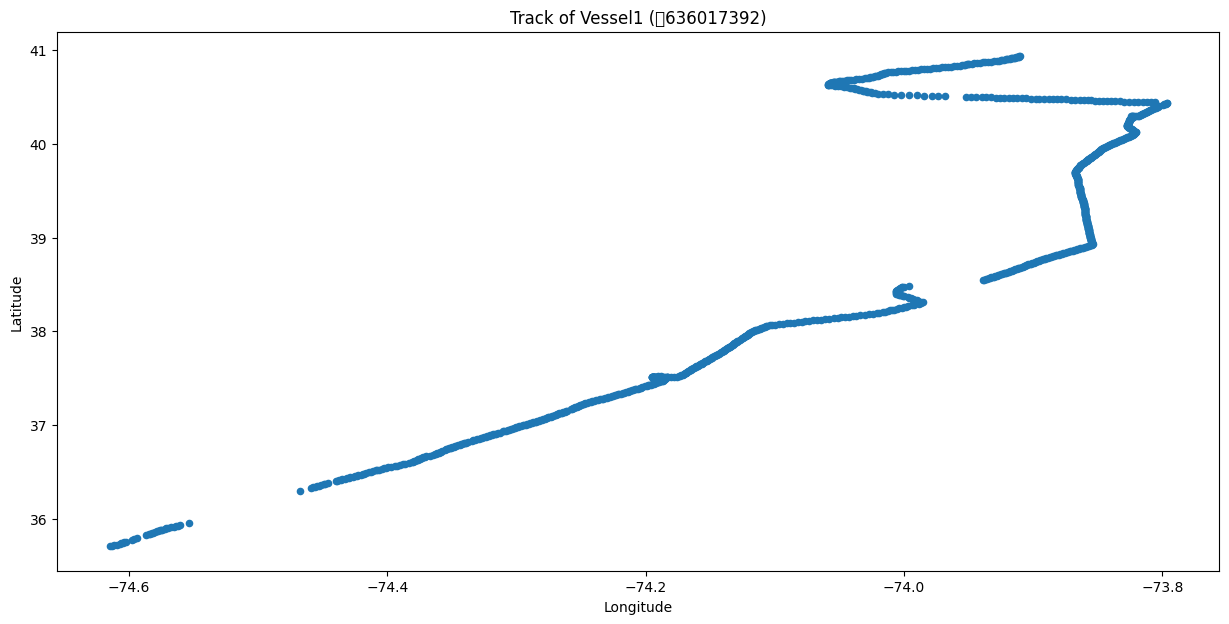

In [186]:
# Now Calculate track of the vessel1(367390380).
import matplotlib.pyplot as plt
track1.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,7))

plt.title("Track of Vessel1 (	636017392)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()